# Importação de Bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

# Lendo arquivo

In [ ]:
df = pd.read_csv('./data/Psycological-Effects-of-COVID.csv')

# Dicionário de Dados

In [ ]:
dicionario = pd.read_csv('./data/Psycological-Effects-of-COVID.csv')
display(Markdown(dicionario.to_markdown(index=False)))

| age    | gender            | occupation                                           | line_of_work        |   time_bp |   time_dp |   travel_time |   easeof_online |   home_env |   prod_inc |   sleep_bal |   new_skill |   fam_connect |   relaxed |   self_time |   like_hw |   dislike_hw | prefer                       | certaindays_hw   |   Unnamed: 19 |   time_bp.1 |   travel+work |
|:-------|:------------------|:-----------------------------------------------------|:--------------------|----------:|----------:|--------------:|----------------:|-----------:|-----------:|------------:|------------:|--------------:|----------:|------------:|----------:|-------------:|:-----------------------------|:-----------------|--------------:|------------:|--------------:|
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               3 |          3 |        0   |         0   |         0.5 |           1   |      -0.5 |        -0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |        11 |           0.5 |               4 |          2 |       -0.5 |         0.5 |        -1   |           1   |       1   |         1   |      1111 |         1110 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        1   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          1 |        0   |         1   |         0.5 |           0   |      -1   |        -0.5 |       100 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |           0   |       0.5 |         0   |      1010 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          4 |       -1   |        -1   |         0   |          -0.5 |       0   |         0   |       110 |         1100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               1 |          3 |        0.5 |         0.5 |         1   |           0.5 |       1   |         1   |      1100 |         1101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               3 |          2 |        0   |        -0.5 |        -0.5 |          -1   |      -0.5 |         0   |      1000 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               1 |          2 |        1   |         1   |         1   |           1   |       1   |         1   |      1010 |          100 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |         0   |      1110 |         1111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          1 |        0   |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1100 |         1011 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               5 |          4 |        0   |        -1   |         1   |          -0.5 |      -1   |        -1   |       110 |         1100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               2 |          1 |       -0.5 |         0   |         0.5 |           1   |       0.5 |         1   |      1110 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |         5 |           0.5 |               5 |          2 |        0   |         0   |         1   |           1   |       0.5 |         1   |      1110 |         1000 | Work/study from home         | Yes              |           nan |          11 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         7 |         5 |           0.5 |               2 |          3 |        0   |        -0.5 |         0.5 |           0.5 |      -0.5 |         0.5 |       110 |         1001 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         9 |           0.5 |               5 |          3 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |        10 |         1000 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           1.5 |               2 |          4 |        0   |        -0.5 |        -1   |           0   |      -0.5 |        -0.5 |       100 |          100 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |        11 |         9 |           0.5 |               2 |          3 |       -0.5 |        -0.5 |        -0.5 |           1   |       0   |         0   |       100 |         1111 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           1.5 |               4 |          5 |        0.5 |        -0.5 |         0.5 |          -0.5 |      -1   |        -0.5 |        10 |         1011 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         5 |           0.5 |               3 |          4 |        0.5 |         0.5 |         0.5 |           1   |       0.5 |         0   |      1000 |         1110 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         7 |         9 |           1.5 |               1 |          2 |        0   |        -1   |         0.5 |           0.5 |       0   |         0   |      1000 |         1101 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         9 |         7 |           0.5 |               5 |          3 |        0.5 |         0.5 |         1   |           1   |       1   |         0.5 |       100 |            1 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           2.5 |               2 |          4 |        0   |         0   |         0   |           0.5 |       0   |         0   |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |         0.5 |           0.5 |       0   |        -0.5 |      1001 |         1001 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           2.5 |               2 |          1 |        0.5 |         0.5 |        -0.5 |           0.5 |       0.5 |         1   |      1000 |         1101 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               3 |          4 |        0.5 |        -0.5 |         0   |           0   |      -0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           1.5 |               4 |          1 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1111 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         4 |           1.5 |               4 |          3 |        0   |        -0.5 |         0.5 |           0   |       0.5 |         0   |        10 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           2.5 |               2 |          1 |        0.5 |         0.5 |        -0.5 |           0.5 |       0.5 |         1   |      1000 |         1101 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |         4 |           0.5 |               5 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               3 |          3 |       -0.5 |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1000 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         5 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         5 |           0.5 |               3 |          3 |        0.5 |         1   |        -1   |           1   |       0   |         0   |         1 |         1111 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           2.5 |               3 |          3 |        0   |        -1   |         1   |           1   |       0.5 |         0.5 |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               4 |          5 |        0   |         1   |         0.5 |          -1   |      -1   |        -1   |      1011 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |        11 |           1.5 |               2 |          1 |        0.5 |         1   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         4 |         4 |           0.5 |               1 |          3 |        1   |         1   |         1   |           1   |       1   |         1   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         4 |           0.5 |               4 |          4 |       -0.5 |        -1   |        -0.5 |          -0.5 |      -1   |        -1   |        10 |         1001 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           1.5 |               2 |          3 |       -0.5 |        -1   |        -1   |           0.5 |       0   |         0.5 |      1000 |         1100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         5 |           0.5 |               5 |          4 |       -0.5 |         0   |         0   |           0   |       0   |         0   |       100 |         1011 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         4 |         5 |           0.5 |               4 |          4 |        0.5 |         0.5 |         1   |           0   |      -0.5 |         0.5 |        11 |         1011 | Complete Physical Attendance | Yes              |           nan |           4 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               3 |          5 |        0.5 |        -0.5 |         0   |           0.5 |       0   |         0   |       110 |         1111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               4 |          3 |       -1   |        -1   |        -1   |           0   |      -1   |        -1   |      1000 |         1010 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 60+    | Prefer not to say | Entrepreneur                                         | nan                 |        12 |        12 |           3   |               5 |          5 |       -1   |        -1   |        -1   |          -1   |      -1   |         0   |         1 |           10 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          4 |        0.5 |         1   |         0.5 |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               5 |          4 |       -1   |         1   |         0.5 |           0.5 |      -0.5 |         0   |      1000 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          3 |       -1   |         0   |         0.5 |           0   |      -0.5 |         0   |      1100 |         1101 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        12 |         7 |           0.5 |               3 |          4 |       -0.5 |         0   |         0   |           0   |       0   |         0   |      1111 |            1 | Work/study from home         | Maybe            |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        12 |         4 |           0.5 |               5 |          5 |       -1   |        -1   |        -1   |          -0.5 |      -1   |        -1   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               3 |          4 |        1   |         0.5 |         1   |           0.5 |       1   |         1   |      1010 |         1111 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               2 |          2 |        0   |         0.5 |         0.5 |           0   |       0   |        -0.5 |         1 |          101 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               4 |          5 |       -0.5 |        -0.5 |        -1   |          -1   |       0   |        -1   |        10 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Entrepreneur                                         | nan                 |        12 |        12 |           1.5 |               2 |          2 |        0.5 |        -0.5 |        -0.5 |           0.5 |      -0.5 |        -0.5 |      1000 |            1 | Work/study from home         | Yes              |           nan |          12 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         9 |           1.5 |               3 |          1 |        0   |        -0.5 |         0   |           0   |       0   |        -0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |         1   |         1   |           1   |       1   |         1   |      1100 |          111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          2 |       -0.5 |        -1   |         0.5 |           0.5 |       0.5 |         1   |        10 |          100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          2 |       -0.5 |        -1   |         0.5 |           0.5 |       0.5 |         1   |        10 |          100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         9 |           0.5 |               2 |          3 |        0.5 |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1010 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               3 |          3 |       -0.5 |         0   |         0   |           0.5 |       0   |        -0.5 |      1110 |         1111 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           1.5 |               4 |          5 |        0   |        -0.5 |        -0.5 |           0.5 |       0   |         0   |      1100 |         1100 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               2 |          3 |       -1   |        -0.5 |        -1   |          -1   |      -0.5 |        -1   |       100 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -1   |        -0.5 |      1000 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |         0   |           0.5 |       0   |         0   |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          1 |       -0.5 |        -0.5 |         1   |           1   |       1   |         1   |      1110 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         9 |         4 |           0.5 |               3 |          2 |       -0.5 |        -1   |         0   |           1   |      -0.5 |         0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Female            | Working Professional                                 | Engineering         |         9 |        12 |           0.5 |               2 |          3 |        0   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |         1101 | Work/study from home         | Yes              |           nan |           9 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |         5 |           1.5 |               3 |          3 |        0.5 |        -1   |         0.5 |          -0.5 |       0.5 |         0   |      1111 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           1.5 |               2 |          2 |       -1   |        -0.5 |        -1   |          -0.5 |      -0.5 |        -1   |      1000 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           2.5 |               4 |          3 |        0   |         0   |         0   |           1   |       1   |         1   |      1111 |         1100 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          3 |        0   |        -1   |         0.5 |           1   |      -1   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Prefer not to say | Retired/Senior Citizen                               | nan                 |         4 |         9 |           2.5 |               3 |          3 |        0.5 |        -1   |         0   |           0   |      -1   |         0   |      1000 |          100 | Complete Physical Attendance | Maybe            |           nan |           4 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           1.5 |               3 |          5 |       -1   |        -1   |         1   |           0   |      -0.5 |         1   |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         4 |         7 |           0.5 |               5 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           4 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               5 |          5 |       -1   |        -1   |        -1   |           0   |      -1   |        -1   |        10 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          4 |        0.5 |        -0.5 |        -0.5 |           0   |      -0.5 |         0   |       100 |           11 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Management          |         9 |         4 |           0.5 |               2 |          3 |       -0.5 |        -0.5 |        -1   |          -0.5 |       0.5 |        -0.5 |       100 |          100 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               2 |          2 |        0   |        -1   |         0.5 |           1   |      -0.5 |         0   |      1100 |         1101 | Work/study from home         | Yes              |           nan |           7 |           nan |
| Dec-18 | Female            | Student in School                                    | nan                 |         7 |         4 |           2.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0.5 |         0   |      1000 |         1001 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |        11 |           1.5 |               3 |          4 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -1   |      1001 |         1110 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           2.5 |               4 |          2 |        0   |        -1   |         0.5 |           0.5 |       0   |         0.5 |      1000 |         1101 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               5 |          5 |       -1   |         0   |        -1   |          -1   |      -0.5 |        -1   |         1 |           10 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               3 |          4 |        0   |        -1   |         1   |           1   |      -0.5 |         0   |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |         5 |           0.5 |               4 |          2 |       -0.5 |        -1   |         0.5 |           0.5 |      -0.5 |         0   |        10 |         1000 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        12 |           0.5 |               5 |          2 |       -1   |        -1   |        -0.5 |           1   |      -0.5 |         0   |      1110 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         5 |           2.5 |               2 |          2 |        0.5 |         0.5 |        -0.5 |           0.5 |      -1   |         0   |      1100 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         9 |        11 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0.5 |         0   |      1110 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |        12 |           0.5 |               2 |          3 |        0   |        -1   |        -0.5 |           0   |      -1   |         0   |      1100 |         1101 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         5 |           0.5 |               3 |          3 |        0   |         0.5 |         0   |           0.5 |      -0.5 |         0   |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         9 |         7 |           0.5 |               3 |          3 |        0.5 |        -1   |         0   |           0.5 |       0.5 |         1   |      1001 |         1101 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           1.5 |               3 |          3 |       -0.5 |         0   |         0.5 |           0.5 |       0   |         0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        12 |           0.5 |               5 |          5 |        0   |        -0.5 |         0.5 |           1   |      -1   |         0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               4 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           2.5 |               2 |          1 |        0.5 |         0.5 |        -0.5 |           0.5 |       0.5 |         1   |      1000 |         1101 | Work/study from home         | Yes              |           nan |           9 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         9 |         7 |           1.5 |               4 |          4 |       -1   |        -1   |         0.5 |           0.5 |       0.5 |         0.5 |        10 |         1000 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          5 |        0   |         0   |        -0.5 |           0.5 |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |        12 |           0.5 |               5 |          3 |        0   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         5 |           0.5 |               4 |          3 |        0   |        -0.5 |         0.5 |           0.5 |      -1   |        -0.5 |      1100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         9 |         7 |           0.5 |               3 |          2 |       -0.5 |         0.5 |         1   |           1   |      -0.5 |         0   |        11 |         1100 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               5 |          5 |       -1   |         0   |         0   |           1   |       1   |         1   |       100 |            1 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               5 |          2 |       -1   |        -1   |         0.5 |           1   |      -1   |         0.5 |      1000 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               2 |          4 |        0   |        -0.5 |        -1   |          -0.5 |      -1   |        -0.5 |      1010 |         1100 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           1.5 |               2 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1010 |         1110 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          1 |        1   |         1   |         0.5 |           0.5 |       1   |         0.5 |      1110 |            1 | Work/study from home         | Yes              |           nan |           5 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         4 |         9 |           0.5 |               1 |          2 |       -1   |        -1   |         1   |          -0.5 |       0.5 |         0.5 |       101 |         1100 | Work/study from home         | Yes              |           nan |           4 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         5 |           1.5 |               4 |          4 |       -0.5 |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1000 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               3 |          3 |        0   |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1110 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               4 |          3 |       -1   |        -1   |        -0.5 |           0   |       0   |        -1   |      1000 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         7 |           1.5 |               3 |          2 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0   |      1000 |         1100 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               3 |          2 |       -0.5 |         0   |        -0.5 |           1   |       0   |         0   |      1110 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 33-40  | Female            | Homemaker                                            | nan                 |         4 |         4 |           1.5 |               4 |          2 |       -0.5 |        -0.5 |         0.5 |           0.5 |      -0.5 |        -0.5 |      1000 |         1100 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          3 |        0   |         0   |        -0.5 |           1   |      -0.5 |         0   |      1111 |         1110 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| Dec-18 | Female            | Student in School                                    | nan                 |         5 |         5 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1111 |         1011 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         5 |           0.5 |               4 |          3 |        0   |        -0.5 |         0   |          -1   |      -0.5 |         0   |      1010 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |         5 |           0.5 |               1 |          1 |       -0.5 |        -1   |         1   |           0.5 |       1   |         1   |      1100 |            1 | Work/study from home         | Yes              |           nan |          11 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         9 |         5 |           0.5 |               4 |          4 |       -0.5 |         0.5 |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               4 |          5 |       -1   |        -1   |         0.5 |           1   |      -0.5 |         0.5 |      1000 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               5 |          2 |       -1   |         0   |        -1   |           1   |      -1   |        -0.5 |        10 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               2 |          2 |        0   |        -0.5 |         0.5 |           0.5 |      -1   |         0   |       100 |         1111 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               2 |          1 |        0   |        -1   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |            1 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           3   |               3 |          3 |        0.5 |        -1   |         0.5 |           0   |      -0.5 |        -0.5 |      1001 |            1 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               1 |          2 |        0.5 |         0.5 |         0   |           0.5 |       0   |         0.5 |      1000 |         1100 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               4 |          4 |        0   |         0   |         0.5 |           1   |       1   |         0   |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               5 |          2 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          2 |        0   |         0   |         0.5 |           0   |      -0.5 |        -0.5 |      1000 |         1111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               5 |          5 |       -1   |        -1   |        -1   |           0.5 |      -0.5 |        -0.5 |       100 |            1 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |         7 |           2.5 |               1 |          1 |        0.5 |         1   |         0.5 |           1   |       1   |         1   |      1110 |         1100 | Work/study from home         | Yes              |           nan |          11 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |        -1   |         0   |           0   |      -1   |        -0.5 |        10 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         9 |           0.5 |               3 |          2 |       -0.5 |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Prefer not to say | Student in School                                    | nan                 |         9 |        11 |           1.5 |               2 |          4 |        0   |        -1   |         1   |           0.5 |      -1   |        -1   |      1001 |         1111 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |         5 |           0.5 |               2 |          4 |       -1   |         0.5 |         1   |           1   |       0.5 |         1   |      1100 |         1000 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               1 |          3 |        0   |         0   |         1   |           1   |       0.5 |         1   |      1110 |         1000 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          3 |       -1   |        -1   |        -0.5 |           0   |      -1   |        -0.5 |      1111 |         1101 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               3 |          1 |        0   |        -0.5 |         1   |           0.5 |       0   |         0   |      1100 |         1001 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               3 |          4 |       -0.5 |         0.5 |         1   |           1   |       0.5 |         0.5 |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |        12 |        12 |           0.5 |               5 |          5 |       -1   |         0   |         0   |           0   |       0   |         0   |      1000 |           10 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |        11 |         7 |           2.5 |               4 |          5 |       -0.5 |         0   |        -0.5 |           1   |       0   |         1   |       101 |         1010 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           2.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               4 |          2 |       -0.5 |        -0.5 |         0   |           0   |      -0.5 |        -0.5 |        10 |         1111 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         4 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0   |      -0.5 |        -0.5 |        10 |         1101 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |        12 |           0.5 |               5 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -1   |        10 |         1100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               3 |          4 |       -0.5 |        -0.5 |         0   |           0   |      -1   |        -0.5 |       100 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          3 |        0   |         0.5 |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          4 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       101 |          101 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          4 |        0.5 |        -1   |         0.5 |           1   |       0   |        -0.5 |      1000 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |        12 |           3   |               3 |          3 |       -0.5 |        -0.5 |        -0.5 |           0.5 |      -0.5 |        -0.5 |      1111 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               5 |          3 |        0   |         0.5 |        -0.5 |           0.5 |      -0.5 |        -0.5 |        10 |         1000 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         9 |           1.5 |               4 |          3 |        0   |         0   |         0.5 |           0.5 |       0   |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           2.5 |               2 |          1 |        0.5 |        -1   |        -1   |           0.5 |       0.5 |         0.5 |      1110 |         1101 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         9 |        11 |           1.5 |               3 |          3 |        0.5 |        -1   |        -0.5 |           0   |      -1   |         0   |      1100 |         1101 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               3 |          4 |        0.5 |         0   |         1   |           1   |       0.5 |         0   |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          3 |        0   |        -0.5 |         0.5 |           1   |       0   |         0.5 |      1000 |         1101 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          3 |        0   |        -0.5 |         0.5 |           1   |       0   |         0.5 |      1000 |         1101 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |        12 |           0.5 |               3 |          3 |        0   |        -0.5 |        -0.5 |           0   |      -0.5 |        -0.5 |      1000 |         1100 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           1   |       0   |         0.5 |      1100 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               4 |          4 |        0   |        -0.5 |         0   |           0   |      -0.5 |         0   |      1000 |         1101 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          3 |       -1   |        -0.5 |         0   |          -0.5 |       0   |        -1   |      1011 |           11 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           1.5 |               3 |          3 |       -0.5 |        -0.5 |         0.5 |           0   |       0.5 |         1   |      1010 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               2 |          5 |       -1   |        -1   |         1   |           0.5 |       1   |         1   |      1111 |         1000 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          4 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          3 |        0   |         0.5 |        -0.5 |           1   |      -0.5 |         0   |       111 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               5 |          2 |        1   |         1   |         1   |           1   |       0   |         1   |      1101 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        12 |        12 |           0.5 |               1 |          3 |       -1   |        -1   |         0   |           0   |       0   |         0   |      1110 |         1111 | Complete Physical Attendance | Yes              |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               3 |          3 |       -1   |        -1   |        -1   |          -1   |      -0.5 |         0   |      1000 |           10 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               1 |          2 |        1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | APSPDCL             |         5 |         5 |           1.5 |               2 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |         1101 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           1.5 |               4 |          2 |        0   |        -1   |        -1   |           0.5 |      -0.5 |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               3 |          3 |        0   |        -1   |         0   |           1   |       0.5 |         1   |      1000 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          3 |        0.5 |         0   |         0   |           1   |       0.5 |         0.5 |      1110 |         1101 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| 19-25  | Female            | Currently Out of Work                                | nan                 |         7 |         4 |           0.5 |               2 |          4 |       -0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |       100 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           1.5 |               1 |          2 |        1   |         0.5 |         1   |           1   |       0.5 |         1   |      1100 |           10 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           1.5 |               1 |          5 |       -1   |        -0.5 |        -1   |          -1   |      -1   |        -1   |      1110 |           11 | Work/study from home         | No               |           nan |           9 |           nan |
| 19-25  | Male              | Entrepreneur                                         | nan                 |         5 |         4 |           1.5 |               2 |          1 |       -0.5 |        -0.5 |         0   |           0.5 |      -1   |        -0.5 |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          3 |       -0.5 |        -1   |         0   |          -1   |       0.5 |        -0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Architecture        |        11 |         7 |           1.5 |               4 |          5 |        0   |         0   |         0   |          -1   |      -1   |         0   |       101 |         1101 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         5 |           2.5 |               1 |          5 |       -1   |        -0.5 |         0.5 |           0.5 |      -0.5 |         0   |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           1.5 |               2 |          1 |        0   |         1   |         1   |           0.5 |       0.5 |         0   |      1101 |         1010 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |        -0.5 |           0.5 |       0.5 |         0.5 |      1100 |         1001 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         9 |         5 |           1.5 |               3 |          5 |       -0.5 |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |        10 |         1111 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           1   |       0   |         0   |       100 |         1101 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               2 |          1 |        0.5 |         0.5 |         1   |           1   |       0.5 |         1   |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         4 |         9 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |          100 | Complete Physical Attendance | Yes              |           nan |           4 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          5 |       -1   |         0   |        -1   |          -0.5 |      -0.5 |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           3   |               2 |          2 |        0   |        -0.5 |        -1   |          -1   |      -0.5 |        -1   |      1000 |         1001 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               3 |          4 |        0   |         0   |         0   |           1   |       0.5 |         0.5 |      1100 |           11 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               3 |          3 |        0   |         0.5 |        -0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1110 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         5 |           3   |               3 |          3 |       -0.5 |         0   |         0.5 |           0.5 |       0.5 |         0   |      1111 |         1101 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Female            | Working Professional                                 | Architect           |         7 |         4 |           0.5 |               1 |          1 |        0   |        -1   |         1   |           1   |       0.5 |         0.5 |      1111 |          111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           1.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1111 |          100 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         5 |           0.5 |               3 |          4 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |       110 |         1001 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         7 |         9 |           0.5 |               2 |          4 |        0   |         0.5 |        -0.5 |           0   |      -0.5 |         0   |      1010 |         1011 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           0.5 |               3 |          3 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0   |       111 |         1100 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          4 |       -0.5 |         0.5 |         1   |           1   |      -0.5 |        -0.5 |      1010 |         1110 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| Dec-18 | Female            | Student in School                                    | nan                 |         5 |         4 |           0.5 |               4 |          4 |       -1   |        -0.5 |         0   |           0   |      -1   |         0.5 |      1000 |         1101 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Currently Out of Work                                | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0.5 |           1   |       0   |         0   |      1111 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         9 |           0.5 |               4 |          3 |       -0.5 |        -0.5 |        -1   |          -0.5 |       0   |        -1   |       100 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Entrepreneur                                         | nan                 |         4 |         4 |           0.5 |               2 |          1 |        1   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1101 |         1100 | Work/study from home         | Maybe            |           nan |           4 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           0.5 |               3 |          2 |       -0.5 |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |      1111 |         1111 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Currently Out of Work                                | nan                 |         9 |         4 |           1.5 |               5 |          3 |       -0.5 |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |      1000 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          1 |        0   |         1   |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1000 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |       100 |            1 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 60+    | Prefer not to say | Homemaker                                            | nan                 |        12 |        12 |           3   |               1 |          2 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1111 |         1111 | Complete Physical Attendance | Maybe            |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               2 |          3 |        0   |        -0.5 |         0   |           0   |       0   |         0   |      1010 |         1110 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0.5 |      -0.5 |         0.5 |      1110 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Homemaker                                            | nan                 |         7 |         9 |           0.5 |               3 |          3 |        0   |        -0.5 |         0.5 |           1   |       0.5 |        -0.5 |      1100 |          101 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           2.5 |               3 |          3 |       -0.5 |        -0.5 |         1   |           0.5 |      -1   |         0.5 |      1100 |         1001 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          110 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           2.5 |               2 |          2 |        0.5 |        -0.5 |         1   |           0.5 |       0.5 |         0.5 |      1100 |           11 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Entrepreneur                                         | nan                 |         7 |         5 |           0.5 |               3 |          3 |       -0.5 |        -1   |         0.5 |           0   |      -0.5 |         0   |      1100 |          111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |         5 |           0.5 |               3 |          3 |        0.5 |         0   |         1   |           1   |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         4 |           1.5 |               2 |          4 |       -0.5 |         0.5 |         0   |           1   |      -1   |         0   |       100 |           10 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           2.5 |               5 |          3 |       -1   |        -1   |        -1   |           0.5 |       0   |        -1   |         1 |         1000 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |         5 |           0.5 |               2 |          1 |        0   |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1000 |          111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         5 |           0.5 |               2 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |        10 |         1000 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Prefer not to say | Student in School                                    | nan                 |         7 |         4 |           0.5 |               1 |          1 |       -0.5 |        -1   |        -0.5 |           0   |       0   |         0.5 |         1 |           10 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |        12 |           1.5 |               3 |          3 |        0   |         0.5 |        -1   |          -1   |      -1   |        -1   |      1000 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          2 |       -1   |        -0.5 |        -1   |           0   |       0   |        -0.5 |      1110 |          110 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Architect           |         7 |         7 |           1.5 |               4 |          2 |       -0.5 |         0   |        -0.5 |           0   |      -0.5 |        -0.5 |      1000 |         1000 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |        11 |         7 |           0.5 |               1 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1110 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         4 |         4 |           1.5 |               1 |          3 |        0   |        -0.5 |         1   |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           4 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0   |        -0.5 |         0.5 |           0   |       0.5 |        -0.5 |      1010 |         1110 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         5 |         5 |           0.5 |               2 |          3 |        0   |         0   |         0.5 |           1   |       0.5 |         0.5 |        10 |           11 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |         7 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0.5 |         0.5 |        10 |            1 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         7 |         5 |           0.5 |               3 |          4 |        0   |         0.5 |         0.5 |           0.5 |      -0.5 |         0.5 |         1 |           10 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         4 |         5 |           1.5 |               2 |          5 |       -1   |        -0.5 |         1   |           0   |      -1   |         0.5 |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |           4 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         4 |         7 |           0.5 |               4 |          4 |        0   |        -1   |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1001 | Complete Physical Attendance | Maybe            |           nan |           4 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         9 |        12 |           0.5 |               3 |          2 |        0   |         0.5 |         0   |           0.5 |       0   |        -0.5 |      1100 |         1001 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Engineering         |         7 |         9 |           1.5 |               2 |          2 |        0.5 |        -0.5 |         1   |           0   |      -0.5 |         0   |        10 |         1011 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          1 |       -0.5 |         0   |         1   |           1   |       0   |         0   |       100 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 33-40  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           1.5 |               4 |          4 |       -0.5 |        -0.5 |        -1   |           0   |      -0.5 |        -0.5 |         1 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         4 |         4 |           0.5 |               1 |          5 |       -1   |        -1   |        -0.5 |           1   |      -1   |        -1   |      1000 |         1111 | Complete Physical Attendance | Yes              |           nan |           4 |           nan |
| 19-25  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           1.5 |               5 |          5 |       -1   |        -1   |         0.5 |           0.5 |      -1   |        -1   |      1000 |         1001 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Prefer not to say | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        1   |         0.5 |         1   |           1   |       1   |         1   |       100 |           10 | Work/study from home         | Yes              |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         9 |         5 |           0.5 |               2 |          2 |       -0.5 |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Male              | Retired/Senior Citizen                               | nan                 |        12 |        12 |           0.5 |               1 |          1 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |            1 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Female            | Working Professional                                 | Management          |         9 |         9 |           1.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1010 |          111 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         4 |         7 |           2.5 |               2 |          5 |        1   |         1   |         1   |           1   |       1   |         1   |      1111 |          100 | Work/study from home         | Maybe            |           nan |           4 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           1.5 |               3 |          2 |        0   |         0.5 |         0.5 |           0.5 |       0   |         0.5 |      1010 |         1001 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         9 |         7 |           1.5 |               4 |          3 |       -1   |        -1   |         0   |           1   |      -1   |         0   |         1 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               5 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         5 |           2.5 |               2 |          4 |        0   |        -0.5 |         1   |           1   |       0.5 |         1   |      1100 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           2.5 |               1 |          1 |        0   |        -0.5 |         0.5 |           0   |       0   |         0   |      1010 |         1011 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 50-60  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           2.5 |               4 |          3 |       -0.5 |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1101 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0   |      -0.5 |         0   |       100 |          100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               1 |          1 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |        10 |         1101 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |        11 |           0.5 |               4 |          2 |        0   |        -0.5 |         0   |           0   |      -1   |         0   |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           2.5 |               3 |          3 |        0   |        -0.5 |         0.5 |           0.5 |       0   |         0   |      1000 |            1 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               1 |          4 |        0   |         0.5 |         0   |           0.5 |       0.5 |         1   |      1000 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           0.5 |               5 |          5 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         5 |           3   |               1 |          3 |        0   |         1   |         1   |           1   |       1   |         1   |      1111 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         4 |         7 |           0.5 |               4 |          3 |        0.5 |        -0.5 |         0   |           0   |      -0.5 |         0.5 |      1000 |         1101 | Complete Physical Attendance | Yes              |           nan |           4 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         5 |         5 |           0.5 |               4 |          4 |       -0.5 |        -1   |        -1   |          -0.5 |      -1   |        -1   |      1001 |         1111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         9 |         7 |           0.5 |               3 |          4 |        0   |         0.5 |         0.5 |           1   |       0   |         0   |      1110 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         7 |         7 |           0.5 |               2 |          2 |        1   |        -1   |        -1   |          -1   |       1   |        -1   |      1000 |         1001 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               3 |          2 |        0   |        -0.5 |         0   |          -0.5 |      -0.5 |         0   |       110 |          100 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Homemaker                                            | nan                 |         5 |         9 |           0.5 |               1 |          2 |        0.5 |         0   |         0.5 |           0.5 |       0   |         0   |       100 |           10 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               5 |          4 |       -1   |        -0.5 |        -1   |          -1   |      -0.5 |        -1   |      1110 |         1000 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         7 |         4 |           0.5 |               3 |          3 |       -0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |         1 |            1 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               4 |          3 |       -0.5 |        -1   |         0.5 |           0.5 |      -0.5 |         0   |       100 |         1110 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Female            | Working Professional                                 | Other               |         9 |         9 |           0.5 |               3 |          2 |        0.5 |         1   |         0.5 |           1   |       1   |         1   |      1011 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |        12 |           1.5 |               3 |          3 |        0   |         0.5 |        -1   |          -1   |      -1   |        -1   |      1000 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Student in College                                   | nan                 |        12 |        12 |           0.5 |               2 |          1 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |            1 | Work/study from home         | Yes              |           nan |          12 |           nan |
| 33-40  | Male              | Currently Out of Work                                | nan                 |         5 |         7 |           2.5 |               4 |          4 |       -0.5 |         0.5 |         0.5 |           0.5 |       1   |         0.5 |       101 |         1100 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 60+    | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               4 |          4 |        0   |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1010 |         1001 | Work/study from home         | Yes              |           nan |           4 |           nan |
| 19-25  | Male              | Working Professional                                 | Architect           |         7 |         7 |           1.5 |               4 |          2 |       -0.5 |         0   |        -0.5 |           0   |      -0.5 |        -0.5 |      1000 |         1000 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           0.5 |               3 |          3 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0   |       111 |         1100 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               3 |          3 |        1   |        -1   |         1   |          -1   |      -1   |         1   |        10 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               5 |          5 |        0   |         0.5 |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         4 |           1.5 |               3 |          1 |       -0.5 |        -1   |         0   |           0   |      -0.5 |        -0.5 |      1000 |         1110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               1 |          1 |        1   |         0.5 |         1   |           1   |       1   |         1   |      1110 |            1 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         4 |         4 |           0.5 |               5 |          2 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |          100 | Work/study from home         | Maybe            |           nan |           4 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         7 |         9 |           0.5 |               1 |          1 |        0   |         0   |         0   |           0   |       0   |         0   |       100 |          100 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| Dec-18 | Female            | Student in School                                    | nan                 |         7 |         7 |           0.5 |               1 |          4 |       -0.5 |        -0.5 |         1   |           1   |       1   |         1   |         1 |            1 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |        11 |        11 |           1.5 |               4 |          3 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         4 |         4 |           1.5 |               5 |          5 |       -0.5 |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Work/study from home         | Yes              |           nan |           4 |           nan |
| 60+    | Male              | Working Professional                                 | Other               |         9 |         7 |           1.5 |               5 |          2 |       -0.5 |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Prefer not to say | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        1   |        -0.5 |         1   |           1   |       1   |         1   |      1110 |         1001 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 40-50  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |         7 |        12 |           1.5 |               5 |          5 |       -0.5 |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Government Employee |         7 |        12 |           2.5 |               4 |          3 |       -0.5 |        -1   |        -0.5 |          -1   |      -1   |        -0.5 |       110 |            1 | Work/study from home         | No               |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               1 |          4 |       -0.5 |        -0.5 |         0   |           0   |       0   |         0   |      1010 |         1100 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |        11 |        12 |           3   |               2 |          3 |        1   |         0   |         0.5 |           0.5 |       0.5 |        -0.5 |       100 |         1011 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |         0   |        -1   |           1   |       0   |        -1   |       100 |          101 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         5 |           1.5 |               3 |          2 |        1   |         1   |         1   |           1   |       1   |         1   |      1000 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Working Professional                                 | Engineering         |        12 |        12 |           1.5 |               1 |          1 |        1   |         1   |        -0.5 |           0.5 |       0.5 |         0   |      1101 |         1100 | Work/study from home         | Yes              |           nan |          12 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |        11 |        12 |           3   |               2 |          3 |        1   |         0   |         0.5 |           0.5 |       0.5 |        -0.5 |       100 |         1011 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 33-40  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1100 |         1001 | Work/study from home         | Yes              |           nan |           9 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |         5 |           0.5 |               4 |          2 |       -0.5 |         0   |         0.5 |           1   |       0   |         0   |       100 |         1000 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         7 |         4 |           0.5 |               3 |          3 |       -0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |         1 |            1 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         5 |           1.5 |               2 |          4 |       -0.5 |        -0.5 |         1   |           1   |       0.5 |         0.5 |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          2 |       -0.5 |         0   |        -0.5 |          -1   |       0   |        -1   |      1000 |         1101 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               5 |          4 |       -1   |         0   |        -0.5 |           0   |      -1   |        -1   |      1100 |         1101 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         1   |           0   |      -1   |         1   |        10 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| Dec-18 | Female            | Student in College                                   | nan                 |         7 |        12 |           1.5 |               1 |          3 |        1   |        -1   |         0   |          -1   |       1   |        -0.5 |      1111 |         1100 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |        12 |           1.5 |               4 |          4 |       -0.5 |        -1   |         0   |          -1   |       0   |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               4 |          2 |       -0.5 |        -0.5 |         1   |           0   |      -0.5 |         0.5 |      1000 |         1110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         9 |         5 |           0.5 |               5 |          4 |       -1   |        -1   |         0   |          -1   |      -1   |        -1   |        10 |         1101 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         7 |         5 |           0.5 |               3 |          5 |       -0.5 |        -0.5 |        -0.5 |           0.5 |       0   |        -0.5 |      1010 |         1101 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               2 |          2 |        0.5 |         0.5 |         0.5 |           1   |       0   |         0.5 |      1100 |            1 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         9 |         4 |           2.5 |               3 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0   |        10 |         1000 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Student in College                                   | nan                 |         9 |        12 |           0.5 |               4 |          4 |       -0.5 |        -1   |        -1   |          -0.5 |      -1   |        -0.5 |      1110 |         1111 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |         9 |         9 |           1.5 |               1 |          1 |        1   |         0.5 |         1   |           1   |       0.5 |         0.5 |      1100 |         1101 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |         9 |         9 |           0.5 |               3 |          3 |        0.5 |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 50-60  | Male              | Working Professional                                 | Management          |        11 |        11 |           1.5 |               3 |          3 |       -0.5 |         0   |         0.5 |           0.5 |       0.5 |         0.5 |       100 |         1000 | Work/study from home         | Yes              |           nan |          11 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         5 |           1.5 |               2 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1001 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           0.5 |               3 |          3 |        0   |         0   |        -1   |          -1   |       0   |         0   |        11 |         1010 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0   |         0   |      1111 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         7 |         5 |           1.5 |               3 |          3 |       -0.5 |         0   |         0.5 |           0.5 |       0.5 |         0.5 |       100 |         1000 | Work/study from home         | No               |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Other               |         7 |         7 |           3   |               2 |          5 |       -0.5 |         0.5 |        -0.5 |           0.5 |       0.5 |         0.5 |      1000 |          100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 50-60  | Male              | Working Professional                                 | Management          |         9 |         9 |           0.5 |               2 |          4 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1100 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Other               |        11 |        11 |           2.5 |               4 |          4 |        0   |         0   |         0   |          -1   |       0   |        -1   |       111 |         1111 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         7 |         9 |           2.5 |               3 |          3 |        0.5 |         0.5 |         0.5 |           1   |       0   |         0.5 |      1100 |         1110 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        12 |           0.5 |               2 |          5 |       -1   |        -1   |        -1   |           0.5 |      -1   |        -1   |      1000 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |         9 |        11 |           0.5 |               2 |          2 |        0.5 |         0   |         0   |           1   |       0   |         0   |      1100 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Prefer not to say | Working Professional                                 | Management          |        11 |        11 |           2.5 |               2 |          2 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1001 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         9 |        11 |           1.5 |               3 |          2 |        0.5 |         1   |         0   |           1   |       0.5 |         0.5 |      1010 |         1101 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |         7 |         9 |           0.5 |               2 |          2 |       -0.5 |         0   |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1010 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |         9 |        11 |           0.5 |               2 |          1 |        1   |         0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1010 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           0.5 |               2 |          1 |        0.5 |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |          -0.5 |      -0.5 |        -0.5 |      1000 |         1101 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |         7 |           1.5 |               1 |          3 |        1   |         1   |         1   |           1   |       1   |         1   |      1101 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |        12 |           1.5 |               2 |          1 |        1   |         0   |        -0.5 |          -0.5 |       0.5 |         0   |      1000 |            1 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |         7 |           1.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1110 |           10 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        12 |           0.5 |               3 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1100 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0   |         0   |        -0.5 |           1   |       0.5 |         0   |      1111 |         1010 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Working Professional                                 | Other               |         9 |         4 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0   |           1   |      -1   |        -0.5 |       100 |         1101 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         9 |        11 |           1.5 |               3 |          2 |        0   |        -0.5 |         0.5 |           0   |       0   |         0   |      1000 |           11 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        12 |           0.5 |               4 |          5 |        0   |        -0.5 |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |         1100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |         9 |         9 |           2.5 |               2 |          4 |       -0.5 |         0   |        -1   |          -0.5 |       0   |         0   |      1000 |         1100 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 50-60  | Male              | Working Professional                                 | Management          |         9 |         5 |           1.5 |               2 |          1 |       -0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0.5 |      1000 |           11 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |        12 |           0.5 |               2 |          3 |        0   |        -0.5 |         0   |          -0.5 |      -0.5 |        -0.5 |       100 |            1 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               3 |          3 |        0   |        -1   |        -1   |          -1   |      -1   |        -1   |         1 |         1000 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               3 |          3 |        0   |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |      1000 |         1110 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               1 |          2 |        0   |        -1   |         0   |           0   |       0   |        -0.5 |      1111 |         1101 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           1.5 |               3 |          3 |        0   |         0   |         0   |           0.5 |       0   |         0   |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               1 |          1 |        0   |         0   |        -0.5 |           1   |       1   |         0   |      1001 |           10 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        12 |           2.5 |               3 |          3 |       -0.5 |         0   |        -1   |           0   |       0   |        -0.5 |      1101 |         1010 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 50-60  | Female            | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |         1111 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               3 |          4 |        0   |         0   |         0.5 |           0.5 |       0   |         0.5 |      1000 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               3 |          4 |        0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |      1011 |         1100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         5 |        11 |           0.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |       100 |          100 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         7 |         9 |           2.5 |               3 |          3 |        0.5 |         0.5 |         0.5 |           1   |       0   |         0.5 |      1100 |         1110 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           1.5 |               1 |          1 |       -1   |         0   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               3 |          4 |       -0.5 |        -0.5 |        -0.5 |           0.5 |      -0.5 |         0   |      1000 |         1101 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               3 |          1 |        0   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |         1000 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 33-40  | Male              | Entrepreneur                                         | nan                 |         5 |         4 |           0.5 |               1 |          2 |        0   |        -1   |         0.5 |           0.5 |       0.5 |        -0.5 |      1000 |          100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               5 |          4 |        0   |        -0.5 |         0   |           0   |      -0.5 |         0   |      1000 |         1110 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 50-60  | Male              | Working Professional                                 | Government Employee |         7 |         7 |           1.5 |               3 |          4 |        0.5 |         0   |         0.5 |           1   |       0.5 |         0.5 |      1000 |         1100 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        12 |           0.5 |               5 |          1 |        0.5 |        -1   |        -1   |           0.5 |      -0.5 |        -0.5 |       110 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         5 |         4 |           0.5 |               3 |          2 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0   |       100 |         1101 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 33-40  | Female            | Homemaker                                            | nan                 |         5 |         9 |           0.5 |               5 |          3 |        0.5 |        -0.5 |         0   |           1   |      -0.5 |        -0.5 |       100 |          100 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Currently Out of Work                                | nan                 |         5 |         4 |           2.5 |               4 |          4 |       -1   |         0.5 |         0   |           0.5 |      -0.5 |        -0.5 |       100 |         1101 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           1.5 |               2 |          3 |        0.5 |        -1   |         0   |           0   |      -0.5 |        -0.5 |       100 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          3 |        0   |         0   |        -0.5 |           0   |      -0.5 |        -1   |       100 |         1101 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |        11 |         9 |           1.5 |               2 |          1 |        0   |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |         1100 | Work/study from home         | Yes              |           nan |          11 |           nan |
| 50-60  | Female            | Working Professional                                 | Government Employee |         7 |         5 |           2.5 |               1 |          3 |        0   |         0   |         0   |           0   |       0.5 |         0.5 |      1100 |          100 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          4 |        0   |        -0.5 |         0   |          -0.5 |       0   |        -0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 50-60  | Male              | Working Professional                                 | Engineering         |         7 |         7 |           1.5 |               5 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |         1 |            1 | Work/study from home         | Maybe            |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         7 |         7 |           0.5 |               2 |          3 |        1   |         0   |         0   |           0.5 |       0.5 |         0   |      1111 |         1011 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         7 |         5 |           0.5 |               3 |          2 |       -0.5 |        -0.5 |         0.5 |          -0.5 |      -0.5 |         0.5 |      1100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Homemaker                                            | nan                 |         7 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -1   |      1100 |          110 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Management          |         9 |         9 |           2.5 |               3 |          1 |        0   |         0   |         0   |           0.5 |       0   |         0   |      1101 |         1001 | Work/study from home         | Maybe            |           nan |           9 |           nan |
| 50-60  | Male              | Working Professional                                 | Government Employee |         9 |         9 |           1.5 |               2 |          5 |       -0.5 |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |         1 |         1000 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         7 |        12 |           0.5 |               3 |          5 |        0   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |         1100 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Male              | Working Professional                                 | Engineering         |         7 |         9 |           0.5 |               4 |          4 |        0   |         0   |         0.5 |           0.5 |       0   |         0.5 |      1000 |           11 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 33-40  | Male              | Working Professional                                 | Other               |         9 |         9 |           0.5 |               2 |          3 |        0.5 |        -0.5 |         0   |           1   |       0.5 |         0   |      1110 |          110 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 50-60  | Male              | Entrepreneur                                         | nan                 |         9 |        12 |           0.5 |               1 |          2 |        0   |        -0.5 |         0.5 |           0.5 |       0   |        -0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 50-60  | Male              | Working Professional                                 | Government Employee |         9 |         9 |           0.5 |               3 |          2 |        0   |         0   |        -0.5 |          -0.5 |      -0.5 |        -0.5 |         1 |         1111 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 50-60  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               2 |          2 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |           11 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 50-60  | Male              | Currently Out of Work                                | nan                 |        11 |         4 |           1.5 |               2 |          4 |        0   |        -0.5 |        -1   |           0   |      -0.5 |         0   |       101 |         1001 | Work/study from home         | Yes              |           nan |          11 |           nan |
| 50-60  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          4 |       -0.5 |         0   |         0   |          -0.5 |      -0.5 |         0   |        10 |          100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Other               |         9 |         9 |           0.5 |               2 |          3 |        0.5 |        -0.5 |         0   |           1   |       0.5 |         0   |      1110 |          110 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               1 |          2 |        0.5 |         0   |         0.5 |           0.5 |      -0.5 |        -0.5 |       100 |           11 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         7 |         9 |           1.5 |               1 |          2 |        1   |        -0.5 |         0.5 |          -0.5 |      -0.5 |         0   |       100 |         1001 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 40-50  | Male              | Working Professional                                 | Management          |         9 |        11 |           1.5 |               4 |          2 |       -0.5 |        -0.5 |         0.5 |           1   |       0.5 |         0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        12 |        11 |           1.5 |               2 |          3 |        0   |        -0.5 |         0   |           0   |      -0.5 |         0.5 |      1000 |         1111 | Work/study from home         | Yes              |           nan |          12 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               4 |          5 |        0   |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |       110 |         1101 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Working Professional                                 | Management          |         7 |         9 |           0.5 |               3 |          2 |        1   |        -1   |        -0.5 |          -1   |      -0.5 |         0   |      1000 |         1100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Engineering         |         4 |         4 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |          101 | Complete Physical Attendance | Yes              |           nan |           4 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |        11 |         7 |           0.5 |               2 |          3 |        0.5 |         1   |        -0.5 |           0.5 |       0.5 |         0.5 |         1 |          100 | Work/study from home         | Yes              |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         5 |           1.5 |               3 |          4 |        0   |        -1   |        -0.5 |          -0.5 |      -1   |         0   |      1011 |         1100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               5 |          4 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |       100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           1.5 |               1 |          5 |        0.5 |        -0.5 |         1   |           0.5 |       0.5 |         1   |      1010 |         1110 | Work/study from home         | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in School                                    | nan                 |         7 |        11 |           0.5 |               4 |          2 |        0.5 |         1   |         0.5 |           1   |       0   |         0.5 |      1000 |         1000 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               1 |          3 |        0   |         0   |         0.5 |           0   |      -0.5 |        -0.5 |      1111 |         1110 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         9 |         7 |           0.5 |               3 |          3 |       -1   |        -0.5 |        -1   |          -1   |      -1   |        -1   |      1010 |            1 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         4 |         4 |           0.5 |               1 |          1 |       -1   |        -1   |        -1   |          -1   |      -1   |        -1   |      1000 |            1 | Complete Physical Attendance | No               |           nan |           4 |           nan |
| 33-40  | Male              | Working Professional                                 | Government Employee |         7 |         5 |           1.5 |               4 |          3 |       -1   |         0.5 |         0   |           1   |       0.5 |         0   |       100 |            1 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Other               |         9 |        11 |           0.5 |               1 |          5 |        1   |        -1   |         0.5 |           0.5 |       0   |         0   |      1111 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Working Professional                                 | Teaching            |         9 |         9 |           0.5 |               1 |          3 |       -0.5 |        -0.5 |         0.5 |           1   |       1   |         1   |      1100 |         1100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 19-25  | Female            | Entrepreneur                                         | nan                 |         5 |        11 |           0.5 |               1 |          1 |        1   |        -1   |         1   |           1   |       1   |         1   |      1111 |           10 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        11 |           0.5 |               4 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          3 |        0   |        -1   |         0   |           0   |       0   |         0   |      1110 |          111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 50-60  | Male              | Working Professional                                 | Management          |         9 |         9 |           0.5 |               2 |          4 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1100 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Other               |        11 |        11 |           2.5 |               4 |          4 |        0   |         0   |         0   |          -1   |       0   |        -1   |       111 |         1111 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         7 |         9 |           2.5 |               3 |          3 |        0.5 |         0.5 |         0.5 |           1   |       0   |         0.5 |      1100 |         1110 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Female            | Working Professional                                 | Management          |         9 |        12 |           0.5 |               2 |          5 |       -1   |        -1   |        -1   |           0.5 |      -1   |        -1   |      1000 |         1111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 26-32  | Male              | Working Professional                                 | Management          |         7 |         9 |           1.5 |               1 |          1 |        0.5 |         0.5 |         1   |           1   |       0   |         0.5 |       100 |          101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         9 |         9 |           2.5 |               2 |          2 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0.5 |      1110 |          111 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           2.5 |               5 |          4 |       -0.5 |         0.5 |         0.5 |           1   |       0.5 |         0.5 |      1001 |         1010 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 40-50  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           1.5 |               3 |          2 |       -0.5 |        -0.5 |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1111 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 50-60  | Male              | Medical Professional aiding efforts against COVID-19 | nan                 |        12 |        12 |           2.5 |               3 |          3 |       -0.5 |        -1   |        -1   |          -1   |      -1   |        -0.5 |      1100 |         1100 | Complete Physical Attendance | No               |           nan |          12 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               1 |          1 |        0   |         0   |         0.5 |           0.5 |       0.5 |         0   |      1100 |         1111 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               3 |          2 |        0   |        -0.5 |         0   |           0.5 |      -0.5 |         0   |      1001 |         1111 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         5 |           0.5 |               1 |          3 |        0   |         0   |         0.5 |           0.5 |      -0.5 |         0.5 |      1011 |         1000 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| Dec-18 | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               4 |          5 |       -0.5 |         0   |         0   |           0.5 |       0   |         0.5 |       100 |            1 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           0.5 |               5 |          5 |       -1   |         0   |         0.5 |           0.5 |      -0.5 |         0   |      1110 |         1011 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |        11 |        12 |           3   |               3 |          4 |        0.5 |        -1   |         0   |          -0.5 |      -1   |        -0.5 |      1010 |         1111 | Complete Physical Attendance | No               |           nan |          11 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           0.5 |               1 |          3 |        0.5 |        -0.5 |        -0.5 |           0   |       0   |         0.5 |      1010 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          1 |        0   |         1   |         0.5 |           0   |      -1   |        -0.5 |       100 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |           0   |       0.5 |         0   |      1010 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          4 |       -1   |        -1   |         0   |          -0.5 |       0   |         0   |       110 |         1100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               1 |          3 |        0.5 |         0.5 |         1   |           0.5 |       1   |         1   |      1100 |         1101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               3 |          2 |        0   |        -0.5 |        -0.5 |          -1   |      -0.5 |         0   |      1000 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               1 |          2 |        1   |         1   |         1   |           1   |       1   |         1   |      1010 |          100 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |         0   |      1110 |         1111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          1 |        0   |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1100 |         1011 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               5 |          4 |        0   |        -1   |         1   |          -0.5 |      -1   |        -1   |       110 |         1100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               2 |          1 |       -0.5 |         0   |         0.5 |           1   |       0.5 |         1   |      1110 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          1 |        0   |         1   |         0.5 |           0   |      -1   |        -0.5 |       100 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |           0   |       0.5 |         0   |      1010 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          4 |       -1   |        -1   |         0   |          -0.5 |       0   |         0   |       110 |         1100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               1 |          3 |        0.5 |         0.5 |         1   |           0.5 |       1   |         1   |      1100 |         1101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               3 |          2 |        0   |        -0.5 |        -0.5 |          -1   |      -0.5 |         0   |      1000 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               1 |          2 |        1   |         1   |         1   |           1   |       1   |         1   |      1010 |          100 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |         0   |      1110 |         1111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          1 |        0   |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1100 |         1011 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               5 |          4 |        0   |        -1   |         1   |          -0.5 |      -1   |        -1   |       110 |         1100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               2 |          1 |       -0.5 |         0   |         0.5 |           1   |       0.5 |         1   |      1110 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               3 |          1 |        0   |         1   |         0.5 |           0   |      -1   |        -0.5 |       100 |         1111 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |           0   |       0.5 |         0   |      1010 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         7 |           0.5 |               4 |          4 |       -1   |        -1   |         0   |          -0.5 |       0   |         0   |       110 |         1100 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         4 |           0.5 |               1 |          3 |        0.5 |         0.5 |         1   |           0.5 |       1   |         1   |      1100 |         1101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         9 |           0.5 |               3 |          2 |        0   |        -0.5 |        -0.5 |          -1   |      -0.5 |         0   |      1000 |         1000 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               1 |          2 |        1   |         1   |         1   |           1   |       1   |         1   |      1010 |          100 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         7 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |         0   |      1110 |         1111 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |         4 |           0.5 |               2 |          1 |        0   |        -0.5 |         0.5 |           0.5 |       0   |         0.5 |      1100 |         1101 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         5 |         9 |           0.5 |               3 |          3 |        0   |         0   |         0   |           0   |       0   |         0   |      1100 |         1011 | Complete Physical Attendance | No               |           nan |           5 |           nan |
| 19-25  | Male              | Student in College                                   | nan                 |         7 |        11 |           0.5 |               5 |          4 |        0   |        -1   |         1   |          -0.5 |      -1   |        -1   |       110 |         1100 | Complete Physical Attendance | Yes              |           nan |           7 |           nan |
| 19-25  | Female            | Student in College                                   | nan                 |         7 |         7 |           0.5 |               2 |          1 |       -0.5 |         0   |         0.5 |           1   |       0.5 |         1   |      1110 |         1100 | Complete Physical Attendance | Maybe            |           nan |           7 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 50-60  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               1 |          2 |        1   |        -0.5 |        -0.5 |          -0.5 |      -0.5 |        -0.5 |       110 |            1 | Work/study from home         | Maybe            |           nan |           5 |           nan |
| 26-32  | Female            | Entrepreneur                                         | nan                 |         5 |         9 |           1.5 |               2 |          2 |        0.5 |         0.5 |         1   |           1   |       1   |         0   |      1110 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 50-60  | Female            | Working Professional                                 | Teaching            |         7 |         9 |           0.5 |               4 |          4 |       -0.5 |        -0.5 |        -0.5 |          -1   |      -0.5 |        -0.5 |       100 |         1111 | Complete Physical Attendance | No               |           nan |           7 |           nan |
| 40-50  | Female            | Working Professional                                 | Teaching            |         7 |         7 |           0.5 |               1 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1000 |         1000 | Work/study from home         | Yes              |           nan |           7 |           nan |
| 60+    | Male              | Currently Out of Work                                | nan                 |         9 |         5 |           1.5 |               4 |          3 |       -1   |         1   |         1   |           1   |       1   |         1   |      1110 |            1 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 33-40  | Male              | Working Professional                                 | Teaching            |         9 |        11 |           0.5 |               2 |          3 |        0   |         0.5 |         0.5 |           0   |       0.5 |         0   |      1000 |          100 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         5 |           1.5 |               2 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1001 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           0.5 |               3 |          3 |        0   |         0   |        -1   |          -1   |       0   |         0   |        11 |         1010 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0   |         0   |      1111 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         5 |           1.5 |               2 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1001 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           0.5 |               3 |          3 |        0   |         0   |        -1   |          -1   |       0   |         0   |        11 |         1010 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0   |         0   |      1111 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         5 |           1.5 |               2 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1001 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           0.5 |               3 |          3 |        0   |         0   |        -1   |          -1   |       0   |         0   |        11 |         1010 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0   |         0   |      1111 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         5 |           1.5 |               2 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1001 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           0.5 |               3 |          3 |        0   |         0   |        -1   |          -1   |       0   |         0   |        11 |         1010 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0   |         0   |      1111 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         5 |           1.5 |               2 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1001 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           0.5 |               3 |          3 |        0   |         0   |        -1   |          -1   |       0   |         0   |        11 |         1010 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0   |         0   |      1111 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         9 |           1.5 |               3 |          5 |        0   |         0   |         0   |           0   |       0   |         0   |      1000 |         1111 | Complete Physical Attendance | No               |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |         5 |           1.5 |               2 |          3 |        0.5 |         0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1001 |          100 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           0.5 |               3 |          3 |        0   |         0   |        -1   |          -1   |       0   |         0   |        11 |         1010 | Complete Physical Attendance | Maybe            |           nan |          11 |           nan |
| 26-32  | Male              | Entrepreneur                                         | nan                 |         5 |         5 |           0.5 |               3 |          4 |       -0.5 |        -1   |         0.5 |           0   |       0   |         0   |      1111 |         1101 | Complete Physical Attendance | Yes              |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Working Professional                                 | Teaching            |         9 |         7 |           0.5 |               1 |          1 |        1   |         1   |         1   |           1   |       1   |         1   |      1100 |         1000 | Work/study from home         | Yes              |           nan |           9 |           nan |
| 33-40  | Female            | Medical Professional aiding efforts against COVID-19 | nan                 |         5 |         7 |           1.5 |               4 |          4 |       -0.5 |         0   |        -0.5 |           0.5 |      -0.5 |         0   |       100 |         1011 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 40-50  | Female            | Entrepreneur                                         | nan                 |         9 |         9 |           0.5 |               2 |          1 |        0.5 |        -0.5 |        -0.5 |           0.5 |       0   |         0   |        10 |            1 | Complete Physical Attendance | Yes              |           nan |           9 |           nan |
| 26-32  | Female            | Homemaker                                            | nan                 |         5 |        12 |           0.5 |               3 |          5 |       -0.5 |        -1   |        -0.5 |           0   |      -0.5 |        -0.5 |       100 |          111 | Complete Physical Attendance | Maybe            |           nan |           5 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |         9 |        11 |           0.5 |               3 |          2 |        0.5 |         0.5 |         0.5 |           0.5 |       0   |         0   |      1111 |          110 | Complete Physical Attendance | Maybe            |           nan |           9 |           nan |
| 26-32  | Male              | Working Professional                                 | Engineering         |        11 |        12 |           1.5 |               2 |          2 |        0   |         0   |         0   |          -1   |       0   |        -0.5 |      1111 |         1100 | Complete Physical Attendance | Yes              |           nan |          11 |           nan |
| 40-50  | Male              | Working Professional                                 | Engineering         |         5 |         5 |           0.5 |               2 |          2 |        0.5 |        -0.5 |         0.5 |           0.5 |       0.5 |         0.5 |      1100 |          101 | Work/study from home         | Yes              |           nan |           5 |           nan |

# Tratamento de Dados

In [ ]:
df.shape

(1175, 22)

O dataframe a ser analisado possui 1.175 linhas e 22 colunas.

In [ ]:
df.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,...,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw,Unnamed: 19,time_bp.1,travel+work
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,...,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes,NaN,7,NaN
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,...,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No,NaN,7,NaN
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,...,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes,NaN,7,NaN
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,...,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes,NaN,7,NaN
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,...,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes,NaN,7,NaN


In [ ]:
df.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,Unnamed: 19,time_bp.1,travel+work
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,0.0,1175.000000,0.0
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234,NaN,7.415319,NaN
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310,NaN,2.005385,NaN
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN,4.000000,NaN
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000,NaN,5.000000,NaN
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000,NaN,7.000000,NaN
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000,NaN,9.000000,NaN
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000,NaN,12.000000,NaN


In [ ]:
df.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,Unnamed: 19,time_bp.1,travel+work
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,0.0,1175.000000,0.0
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234,NaN,7.415319,NaN
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310,NaN,2.005385,NaN
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,NaN,4.000000,NaN
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000,NaN,5.000000,NaN
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000,NaN,7.000000,NaN
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000,NaN,9.000000,NaN
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000,NaN,12.000000,NaN


In [ ]:
df.columns

Index(['age', 'gender', 'occupation', 'line_of_work', 'time_bp', 'time_dp',
       'travel_time', 'easeof_online', 'home_env', 'prod_inc', 'sleep_bal',
       'new_skill', 'fam_connect', 'relaxed', 'self_time', 'like_hw',
       'dislike_hw', 'prefer', 'certaindays_hw', 'Unnamed: 19', 'time_bp.1',
       'travel+work'],
      dtype='object')

Renomeamos as colunas para melhor entendimento e excluimos as últimas três, das quais duas não tem valor algum e a outra não é específicada.

In [ ]:
df.columns = ['Idade', 'Gênero', 'Ocupação', 'Linha de Trabalho','Tempo gasto no trabalho antes da pandemia','Tempo gasto no trabalho na pandemia','Tempo de Jornada de Trabalho','Avaliação de Facilidade com Internet', 'Gosta do ambiente doméstico','Avaliação de melhora de produtividade', 'Avaliação do Ciclo do Sono', 'Ganho de Nova habilidade', 'Avaliação Conexão familiar', 'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si', 'Gosta de home office', 'Não gosta de home office', 'Prefere trabalhar em casa/trabalho', 'Gosta de trabalhar em alguns dias específicos em casa','custom1', 'custom2', 'custom3']

In [ ]:
df['custom2'].unique()

array([ 7,  5,  9, 11,  4, 12], dtype=int64)

In [ ]:
df = df.drop(columns=['custom1','custom2','custom3'])

In [ ]:
df.dtypes

Idade                                                     object
Gênero                                                    object
Ocupação                                                  object
Linha de Trabalho                                         object
Tempo gasto no trabalho antes da pandemia                  int64
Tempo gasto no trabalho na pandemia                        int64
Tempo de Jornada de Trabalho                             float64
Avaliação de Facilidade com Internet                       int64
Gosta do ambiente doméstico                                int64
Avaliação de melhora de produtividade                    float64
Avaliação do Ciclo do Sono                               float64
Ganho de Nova habilidade                                 float64
Avaliação Conexão familiar                               float64
Avaliação de Relaxamento                                 float64
Tempo ganho para cuidar de si                            float64
Gosta de home office     

In [ ]:
df.isnull().sum()

Idade                                                      0
Gênero                                                     0
Ocupação                                                   0
Linha de Trabalho                                        696
Tempo gasto no trabalho antes da pandemia                  0
Tempo gasto no trabalho na pandemia                        0
Tempo de Jornada de Trabalho                               0
Avaliação de Facilidade com Internet                       0
Gosta do ambiente doméstico                                0
Avaliação de melhora de produtividade                      0
Avaliação do Ciclo do Sono                                 0
Ganho de Nova habilidade                                   0
Avaliação Conexão familiar                                 0
Avaliação de Relaxamento                                   0
Tempo ganho para cuidar de si                              0
Gosta de home office                                       0
Não gosta de home office

# Remapeamento

In [ ]:
df['Gênero'].unique()

array(['Male', 'Female', 'Prefer not to say'], dtype=object)

In [ ]:
df['Gênero'] = df['Gênero'].map({"Female": "Mulher", "Male": "Homem", "Prefer not to say": "Prefere não falar"})

In [ ]:
df['Ocupação'].unique()

array(['Student in College', 'Student in School', 'Working Professional',
       'Entrepreneur', 'Retired/Senior Citizen', 'Homemaker',
       'Currently Out of Work',
       'Medical Professional aiding efforts against COVID-19'],
      dtype=object)

In [ ]:
df['Ocupação'] = df['Ocupação'].map({"Student in College": "Universitários", "Student in School": "Estudantes de escolas", "Working Professional": "Profissionais", "Entrepreneur": "Empreendedores", "Retired/Senior Citizen": "Aposentados/Idosos", "Homemaker": "Dono/Dona de Casa", "Currently Out of Work": "Atualmente Sem Trabalho", "Medical Professional aiding efforts against COVID-19": "Médicos auxiliando ao combate contra COVID-19"})

In [ ]:
df['Ocupação']

0              Universitários
1       Estudantes de escolas
2              Universitários
3              Universitários
4              Universitários
                ...          
1170           Empreendedores
1171        Dono/Dona de Casa
1172            Profissionais
1173            Profissionais
1174            Profissionais
Name: Ocupação, Length: 1175, dtype: object

In [ ]:
df['Linha de Trabalho'].unique()

array([nan, 'Teaching', 'Engineering', 'Management', 'APSPDCL ',
       'Architecture', 'Architect', 'Other', 'Government Employee'],
      dtype=object)

In [ ]:
df['Linha de Trabalho'] = df['Linha de Trabalho'].map({"Teaching": "Ensino", "Engineering": "Engenharia", "Management": "Administração", "Architecture": "Arquitetura","Architect": "Arquitetura", "Other": "Outros", "Government Employee": "Funcionário Público"})

In [ ]:
df['Tempo gasto no trabalho antes da pandemia'].unique()

array([ 7,  5,  9, 11,  4, 12], dtype=int64)

In [ ]:
df['Tempo gasto no trabalho na pandemia'].unique()

array([ 5, 11,  7,  4,  9, 12], dtype=int64)

In [ ]:
df['Avaliação de Facilidade com Internet'] = df['Avaliação de Facilidade com Internet'].map({1: "Sem dificuldade", 2: "Pouca dificuldade", 3: "Dificuldade moderada", 4: "Alguma dificuldade",5: "Muita dificuldade"})

In [ ]:
df['Gosta do ambiente doméstico'] = df['Gosta do ambiente doméstico'].map({1: "Detesta", 2: "Não gosta", 3: "Indiferente", 4: "Gosta",5: "Gosta muito"})

In [ ]:
df['Avaliação de melhora de produtividade'].unique()

array([ 0. , -0.5,  1. , -1. ,  0.5])

In [ ]:
df['Avaliação de melhora de produtividade'] = df['Avaliação de melhora de produtividade'].map({-1 : "Grande piora", -0.5: "Piora", 0. : "Indiferente", 0.5 : "Melhora", 1. : "Grande melhora"})

In [ ]:
df['Avaliação do Ciclo do Sono'].unique()

array([ 0. ,  0.5,  1. , -1. , -0.5])

In [ ]:
df['Avaliação do Ciclo do Sono'] = df['Avaliação do Ciclo do Sono'].map({-1 : "Péssima", -0.5: "Ruim", 0. : "Moderada", 0.5 : "Boa", 1. : "Ótima"})

In [ ]:
df['Prefere trabalhar em casa/trabalho'].unique()

array(['Complete Physical Attendance', 'Work/study from home'],
      dtype=object)

In [ ]:
df['Prefere trabalhar em casa/trabalho'] = df['Prefere trabalhar em casa/trabalho'].map({'Complete Physical Attendance' : 'Presencial', 'Work/study from home': "A distância"})

In [ ]:
df['Gosta de trabalhar em alguns dias específicos em casa'].unique()

array(['Yes', 'No', 'Maybe'], dtype=object)

In [ ]:
df['Gosta de trabalhar em alguns dias específicos em casa'] = df['Gosta de trabalhar em alguns dias específicos em casa'].map({'Yes' : 'Sim', 'No' : 'Não', 'Maybe' : 'Talvez'})

### Definindo colunas binárias e não binárias

In [ ]:
df_Nbin = df[['Avaliação do Ciclo do Sono', 'Ganho de Nova habilidade', 'Avaliação Conexão familiar', 'Avaliação de Relaxamento', 'Tempo ganho para cuidar de si']]
df_bin = df[['Gosta de home office', 'Não gosta de home office']]

# Dados Faltantes (Missing Values)

In [ ]:
df.isnull().mean()

Idade                                                    0.000000
Gênero                                                   0.000000
Ocupação                                                 0.000000
Linha de Trabalho                                        0.593191
Tempo gasto no trabalho antes da pandemia                0.000000
Tempo gasto no trabalho na pandemia                      0.000000
Tempo de Jornada de Trabalho                             0.000000
Avaliação de Facilidade com Internet                     0.000000
Gosta do ambiente doméstico                              0.000000
Avaliação de melhora de produtividade                    0.000000
Avaliação do Ciclo do Sono                               0.000000
Ganho de Nova habilidade                                 0.000000
Avaliação Conexão familiar                               0.000000
Avaliação de Relaxamento                                 0.000000
Tempo ganho para cuidar de si                            0.000000
Gosta de h

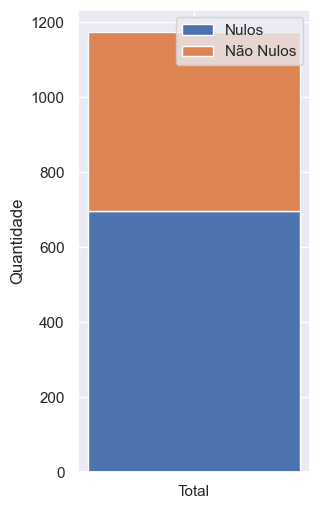

In [ ]:
plt.figure(figsize=(3,6))

nulos = df['Linha de Trabalho'].isnull().sum()
N_nulos = df['Linha de Trabalho'].notnull().sum()

plt.bar('Total', nulos, label='Nulos')
plt.bar('Total', N_nulos, bottom=nulos, label='Não Nulos')

plt.ylabel('Quantidade')

plt.legend()

In [ ]:
NA_Trabalho = df['Linha de Trabalho'].isna().sum()
print(f' Existem {NA_Trabalho} de índividuos que não possuem a linha de trabalho identificadas.')

 Existem 697 de índividuos que não possuem a linha de trabalho identificadas.


# Dados Relacionais

# Matriz de Correlação

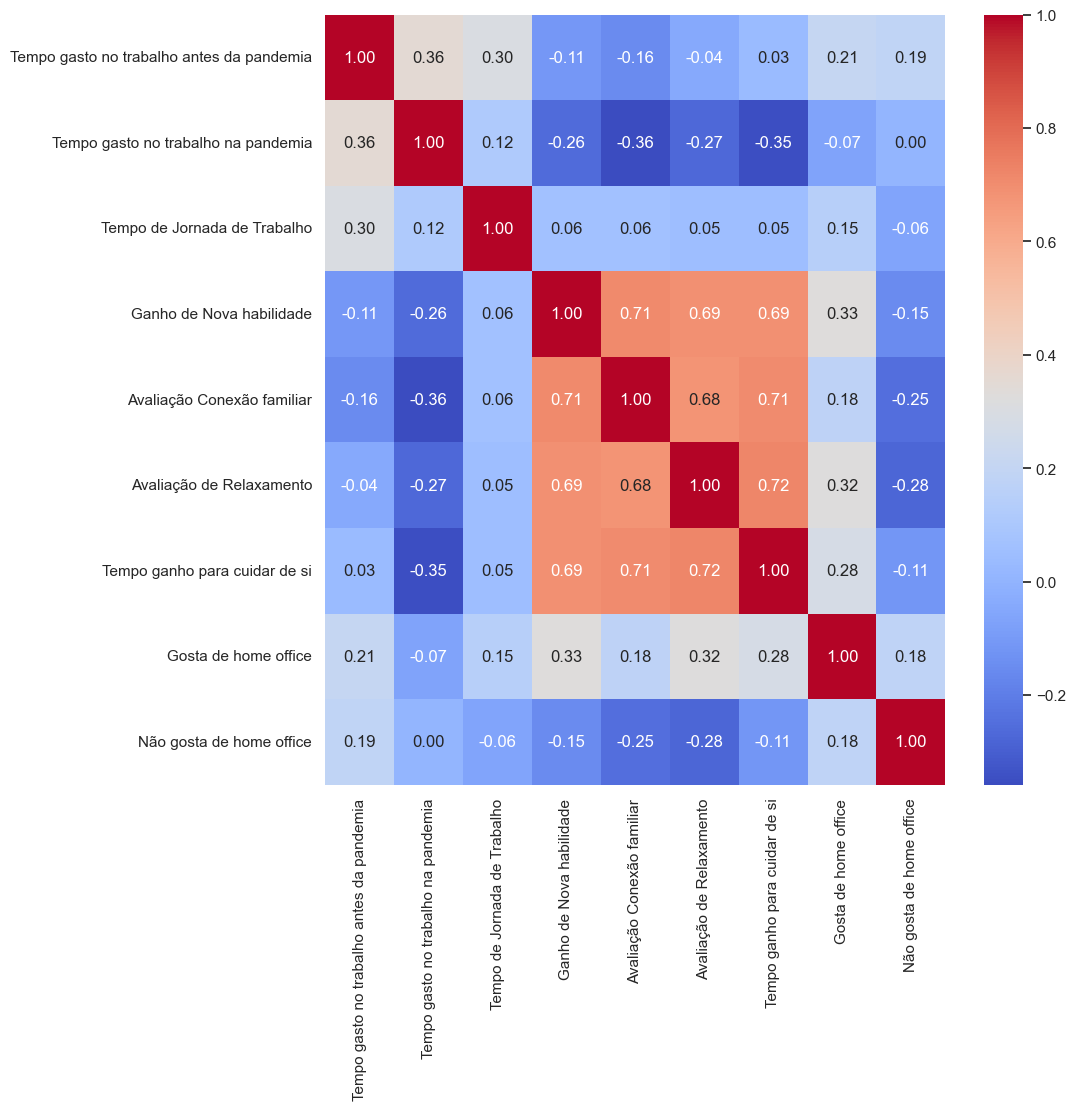

In [ ]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='coolwarm', fmt='.2f')
sns.set (rc = {'figure.figsize':(10, 10)})

# Distribuição de Dados por Faixa Etária

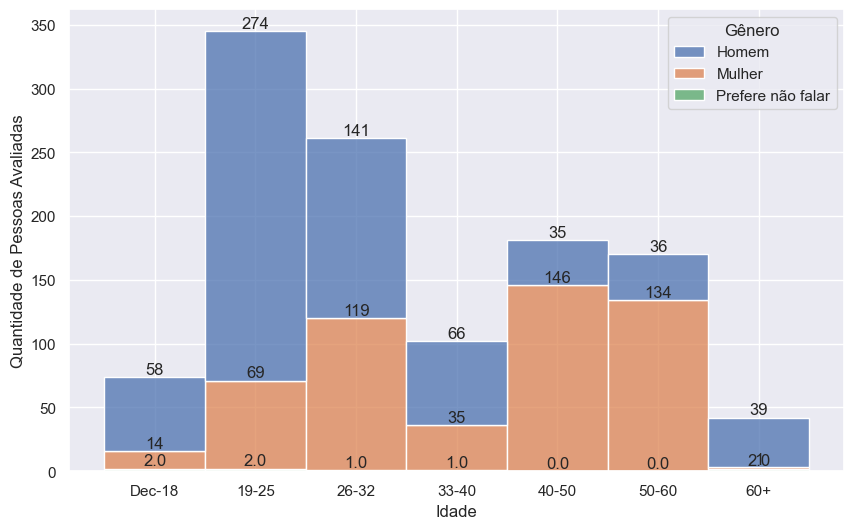

In [ ]:
plt.figure(figsize=(10,6))

df['Idade'] = pd.Categorical(df['Idade'], categories=['Dec-18','19-25', '26-32', '33-40', '40-50', '50-60', '60+'], ordered=True)

ax = sns.histplot(x = 'Idade', hue='Gênero', multiple='stack',
              data = df)
ax.set(xlabel='Idade', ylabel='Quantidade de Pessoas Avaliadas')

for i, p in enumerate(ax.containers):
    ax.bar_label(p, labels=[f'{v.get_height()}' for v in p], label_type='edge')

In [ ]:
df['Idade'].value_counts()

Idade
19-25     345
26-32     261
40-50     181
50-60     170
33-40     102
Dec-18     74
60+        42
Name: count, dtype: int64

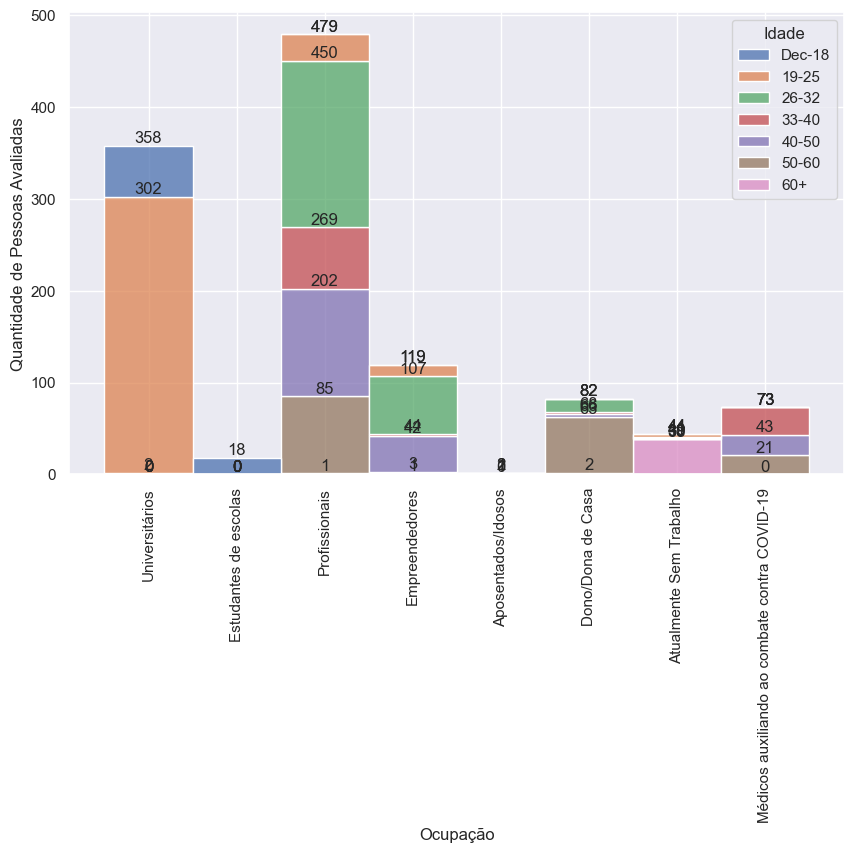

In [ ]:
plt.figure(figsize=(10,6))

ax = sns.histplot(x = 'Ocupação', hue='Idade', multiple='stack',
              data = df)

ax.set(xlabel='Ocupação', ylabel='Quantidade de Pessoas Avaliadas')
ax.tick_params(axis='x', rotation=90)

sns.lmplot(
data=df,
x="bill_length_mm", y="bill_depth_mm", hue="species",
height=5

In [ ]:
df['Idade'].unique()

['19-25', 'Dec-18', '33-40', '60+', '26-32', '40-50', '50-60']
Categories (7, object): ['Dec-18' < '19-25' < '26-32' < '33-40' < '40-50' < '50-60' < '60+']